In [1]:
using CSV
using DataFrames
using Tables
using CairoMakie

In [2]:
df_ack = CSV.read("ackley.csv", DataFrame);
s_ack = CSV.read("ackley_s.csv", DataFrame);
df_ros = CSV.read("rosenbrock.csv", DataFrame);
s_ros = CSV.read("rosenbrock_s.csv", DataFrame);
df_mic = CSV.read("michalewicz.csv", DataFrame);
s_mic = CSV.read("michalewicz_s.csv", DataFrame);

In [5]:
64*4

256

In [96]:
Makie.wong_colors()

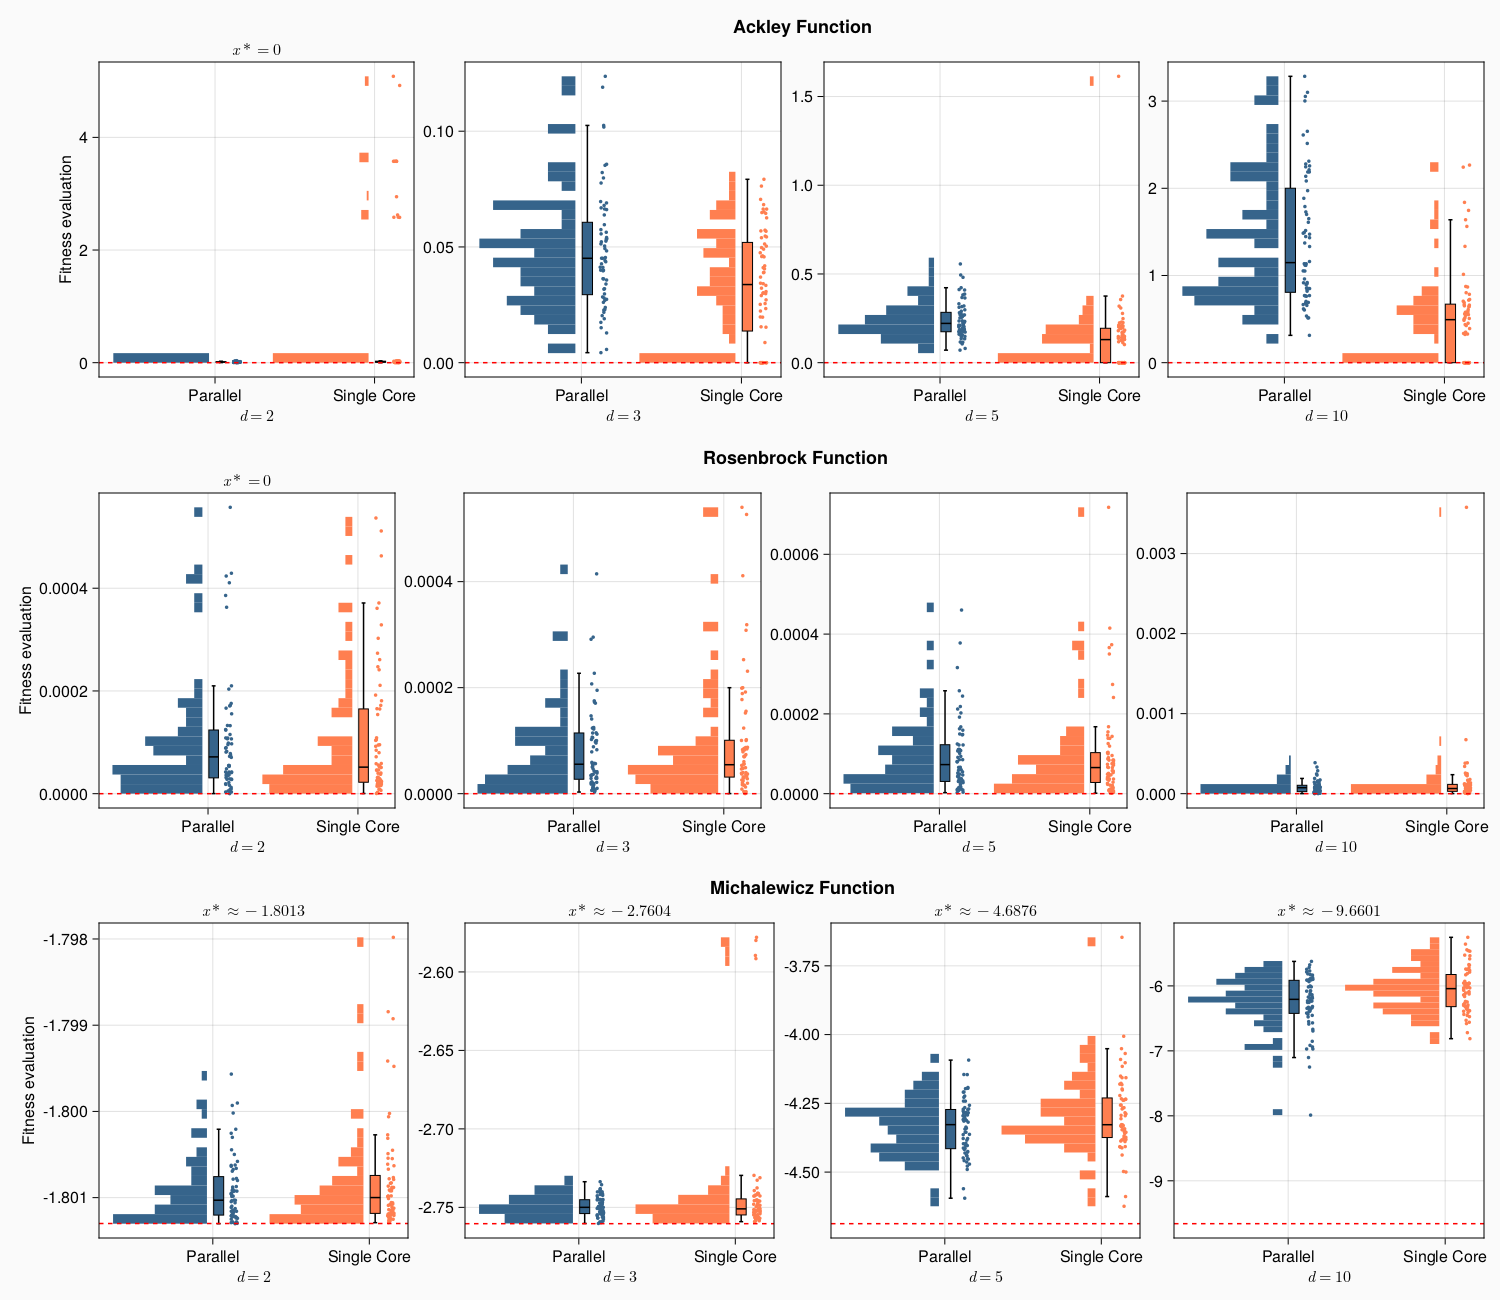

In [138]:
# Ackley

f = Figure(backgroundcolor = RGBf(0.98, 0.98, 0.98),
    resolution = (1500, 1300))

grid_ackley = f[1, 1] = GridLayout()
grid_rosenbrock = f[2, 1] = GridLayout()
grid_michalewicz = f[3, 1] = GridLayout()
# colors = [Makie.wong_colors()[1], Makie.wong_colors()[2]]
colors = [:steelblue4, :coral]

categories = String[]
data_array = Float64[]
append!(categories, fill("Parallel", 64))
append!(categories, fill("Single Core", 64))
append!(data_array, df_ack.d2)
append!(data_array, s_ack.d2)

d2 = Axis(grid_ackley[1, 1], xlabel=L"$d=2$", ylabel = "Fitness evaluation",
          title=L"$x*=0$")

rainclouds!(d2, categories, data_array;
                #    xlabel="Dimension",
                   ylabel="Fitness evaluation",
                   clouds=hist,
                   markersize=5,
                   color=colors[indexin(categories, unique(categories))]
)


data_array = Float64[]
append!(data_array, df_ack.d3)
append!(data_array, s_ack.d3)

d3 = Axis(grid_ackley[1, 2], xlabel=L"$d=3")

rainclouds!(d3, categories, data_array;
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

data_array = Float64[]
append!(data_array, df_ack.d5)
append!(data_array, s_ack.d5)

d5 = Axis(grid_ackley[1, 3], xlabel=L"$d=5")

rainclouds!(d5, categories, data_array;
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

data_array = Float64[]
append!(data_array, df_ack.d10)
append!(data_array, s_ack.d10)

d10 = Axis(grid_ackley[1, 4], xlabel=L"$d=10")

rainclouds!(d10, categories, data_array;
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

hlines!(d2, 0, color = :red, linestyle=:dash)
hlines!(d3, 0, color = :red, linestyle=:dash)
hlines!(d5, 0, color = :red, linestyle=:dash)
hlines!(d10, 0, color = :red, linestyle=:dash)

colgap!(grid_ackley, 10)
rowgap!(grid_ackley, 10)

Label(grid_ackley[1, 2:3, Top()], "Ackley Function",
    valign = :bottom,
    font = :bold,
    fontsize = 18,
    padding = (0, 0, 25, 0))

# Rosenbrock

categories = String[]
data_array = Float64[]
append!(categories, fill("Parallel", 64))
append!(categories, fill("Single Core", 64))
append!(data_array, df_ros.d2)
append!(data_array, s_ros.d2)

d2 = Axis(grid_rosenbrock[1, 1], xlabel=L"$d=2$", ylabel = "Fitness evaluation",
          title=L"$x*=0$")

rainclouds!(d2, categories, data_array;
                #    xlabel="Dimension",
                   ylabel="Fitness evaluation",
                   clouds=hist,
                   markersize=5,
                   color=colors[indexin(categories, unique(categories))]
)

data_array = Float64[]
append!(data_array, df_ros.d3)
append!(data_array, s_ros.d3)

d3 = Axis(grid_rosenbrock[1, 2], xlabel=L"$d=3")

rainclouds!(d3, categories, data_array;
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

data_array = Float64[]
append!(data_array, df_ros.d5)
append!(data_array, s_ros.d5)

d5 = Axis(grid_rosenbrock[1, 3], xlabel=L"$d=5")

rainclouds!(d5, categories, data_array;
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

data_array = Float64[]
append!(data_array, df_ros.d10)
append!(data_array, s_ros.d10)

d10 = Axis(grid_rosenbrock[1, 4], xlabel=L"$d=10")

rainclouds!(d10, categories, data_array;
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

hlines!(d2, 0, color = :red, linestyle=:dash)
hlines!(d3, 0, color = :red, linestyle=:dash)
hlines!(d5, 0, color = :red, linestyle=:dash)
hlines!(d10, 0, color = :red, linestyle=:dash)

colgap!(grid_rosenbrock, 10)
rowgap!(grid_rosenbrock, 10)

Label(grid_rosenbrock[1, 2:3, Top()], "Rosenbrock Function",
    valign = :bottom,
    font = :bold,
    fontsize = 18,
    padding = (0, 0, 25, 0))

# Michalewicz

categories = String[]
data_array = Float64[]
append!(categories, fill("Parallel", 64))
append!(categories, fill("Single Core", 64))
append!(data_array, df_mic.d2)
append!(data_array, s_mic.d2)

mins = [-1.8013, -2.7604, -4.6876, -9.6601]

d2 = Axis(grid_michalewicz[1, 1], xlabel=L"$d=2$", ylabel = "Fitness evaluation",
          title=L"$x* \approx %$(mins[1])$")

rainclouds!(d2, categories, data_array;
                #    xlabel="Dimension",
                   ylabel="Fitness evaluation",
                   clouds=hist,
                   markersize=5,
                   color=colors[indexin(categories, unique(categories))]
)

data_array = Float64[]
append!(data_array, df_mic.d3)
append!(data_array, s_mic.d3)

d3 = Axis(grid_michalewicz[1, 2], xlabel=L"$d=3", title=L"$x* \approx %$(mins[2])$")

rainclouds!(d3, categories, data_array;
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

data_array = Float64[]
append!(data_array, df_mic.d5)
append!(data_array, s_mic.d5)

d5 = Axis(grid_michalewicz[1, 3], xlabel=L"$d=5", title=L"$x* \approx %$(mins[3])$")

rainclouds!(d5, categories, data_array;
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

data_array = Float64[]
append!(data_array, df_mic.d10)
append!(data_array, s_mic.d10)

d10 = Axis(grid_michalewicz[1, 4], xlabel=L"$d=10", title=L"$x* \approx %$(mins[4])$")

rainclouds!(d10, categories, data_array;
            clouds=hist,
            markersize=5,
            color=colors[indexin(categories, unique(categories))]
)

hlines!(d2, mins[1], color = :red, linestyle=:dash)
hlines!(d3, mins[2], color = :red, linestyle=:dash)
hlines!(d5, mins[3], color = :red, linestyle=:dash)
hlines!(d10, mins[4], color = :red, linestyle=:dash)

colgap!(grid_michalewicz, 10)
rowgap!(grid_michalewicz, 10)

Label(grid_michalewicz[1, 2:3, Top()], "Michalewicz Function",
    valign = :bottom,
    font = :bold,
    fontsize = 18,
    padding = (0, 0, 25, 0))
f